# Project 1


In the case project 1, we have given two datasets as follows:
1. Facebook Live Sellers Dataset
2. Sales Prediction Dataset



---



---



# 1. Facebook Live Sellers Dataset:

Here is a brief description of dataset.
The features given to us for the facebook dataset are: status_id, status_type, status_published, num_reaction, num_comments, num_shares, num_likes, num_loves, num_haha, num_sads, num_angry, etc.

What we have to do:
1.	How does the time of upload (`status_published`)  affects the `num_reaction`?
2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?
3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.
4.	Use the elbow method to find the optimum number of clusters.
5.	What is the count of different types of posts in the dataset?
6.	What is the average value of num_reaction, num_comments, num_shares for each post type?




---



1. How does the time of upload (`status_published`)  affects the `num_reaction`?

In [198]:
'''To find out the relationship between these two parameters, Linear Regression will be the best choice, which will help us to predict the new unseen data too.'''
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Importing Dataset
fb_dataset = pd.read_csv("Facebook_Marketplace_data.csv")

In [200]:
# Encoding the Date-Time(status-published) data:
fb_dataset['status_published'] = pd.to_datetime(fb_dataset['status_published'])
fb_dataset['hour_of_day'] = fb_dataset['status_published'].dt.hour

In [201]:
X = fb_dataset.iloc[:,[-1]].values
Y = fb_dataset.iloc[:,[3]].values

In [202]:
# Handling missing data:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(Y[:, :])
Y[:, :] = imputer.transform(Y[:,:])

In [203]:
# Splitting Dataset into training and testing data:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [204]:
# Linear Regression Model training:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [205]:
# Predicting the testing data:
Y_pred = regressor.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

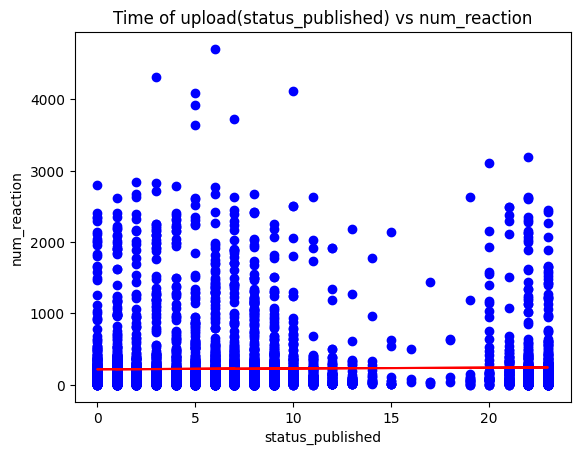

In [206]:
# Visualization of training dataset results:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title("Time of upload(status_published) vs num_reaction")
plt.xlabel('status_published')
plt.ylabel("num_reaction")
plt.show

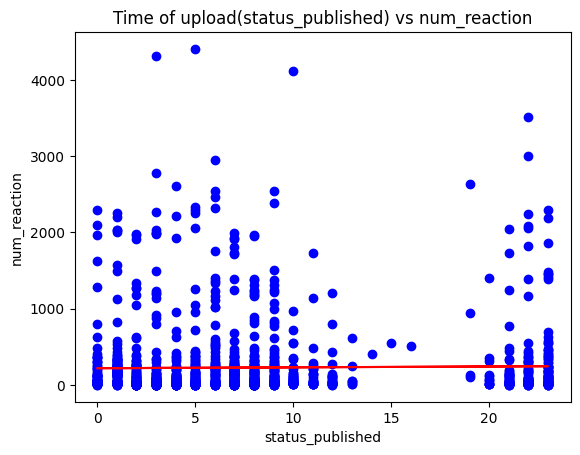

In [207]:
# Visualization of testing dataset results:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'red')
plt.title("Time of upload(status_published) vs num_reaction")
plt.xlabel("status_published")
plt.ylabel("num_reaction")
plt.show()

Above graphs tells us how time of upload affects the num_reactions.



---



2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [208]:
# Assigning the datasets
data1 = fb_dataset.iloc[:,[3]]
data2 = fb_dataset.iloc[:,[4]]
data3 = fb_dataset.iloc[:,[5]]

In [209]:
combined_data = pd.concat([data1, data2, data3], axis = 1)

In [210]:
# Making the correlation matrix between num_reactions, num_comments, and num_shares
correlation_matrix = combined_data.corr()

In [211]:
print(correlation_matrix)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000




---



3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.
4.	Use the elbow method to find the optimum number of clusters.

In [212]:
X1 = fb_dataset.iloc[:,:-5].values
# As we have added the 'hour of the day' in the dataset, we have to remove extra column from last. Hence, we used -5 instead of -4.

In [213]:
# Handling Missing Values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer.fit(X1[:,3:])
X1[:,3:] = imputer.transform(X1[:,3:])

In [214]:
# Encoding the status type:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = "passthrough")
X1 = np.array(ct.fit_transform(X1))

K-means Clustering:

In [215]:
#Importing Libraries
from sklearn.cluster import KMeans

In [216]:
# Dropping the status_published:
matrix = np.array(X1)
new_matrix = np.delete(matrix, 5, axis = 1)
new_dataset = np.delete(new_matrix, 4, axis = 1)

In [217]:
# Using Elbow Method, to find optimal numbers of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 24)
  kmeans.fit(new_dataset)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

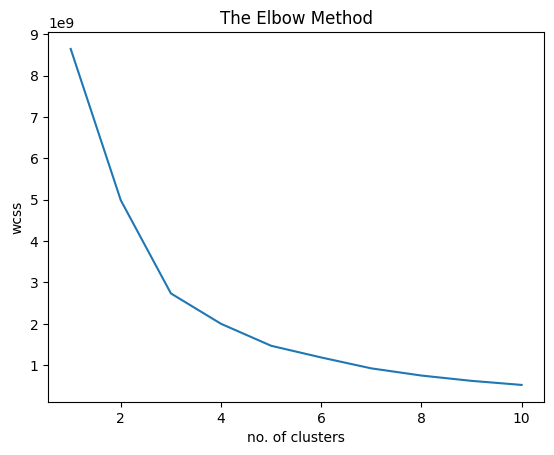

In [218]:
# Plotting the curve between curve and no. of clusters
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.show()

So, the kink or elbow you find in the above curve is at 3 no. of clusters, which will be our optimal no. of clusters.

In [219]:
# Training the K-Means clustering model on our new dataset
'''New dataset includes status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angry.'''
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 24)
y_means = kmeans.fit_predict(new_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)




---



5.	What is the count of different types of posts in the dataset?

In [220]:
X2 = fb_dataset.iloc[:,[1]].values
df = pd.DataFrame(X2, columns = ['status_type'])

In [221]:
# Using value_counts function to find the numbers of different types of posts in our facebook dataset
counts = df['status_type'].value_counts()

In [222]:
print(counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64




---



6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [223]:
Z1 = fb_dataset.iloc[:, [3]]
Z2 = fb_dataset.iloc[:, [4]]
Z3 = fb_dataset.iloc[:, [5]]

In [224]:
# Converting into lists:
list1 = Z1['num_reactions'].tolist()
list2 = Z2['num_comments'].tolist()
list3 = Z3['num_shares'].tolist()

In [225]:
# Calculating averages
avg_num_reactions = np.mean(list1)
avg_num_comments = np.mean(list2)
avg_num_shares = np.mean(list3)

In [226]:
print("The mean of the num_reactions for each posts is", avg_num_reactions)
print("The mean of the num_comments for each posts is", avg_num_comments)
print("The mean of the num_shares for each posts is", avg_num_shares)

The mean of the num_reactions for each posts is 230.11716312056737
The mean of the num_comments for each posts is 224.3560283687943
The mean of the num_shares for each posts is 40.022553191489365




---



---



# 2. Sales Prediction Dataset:

Here is a brief description of dataset. The features given to us for the sales dataset are: Campaign, TV, Radio, Newspaper and Sales.

What we have to do:
1.	What is the average amount spent on TV advertising in the dataset?
2.	What is the correlation between radio advertising expenditure and product sales?
3.	Which advertising medium has the highest impact on sales based on the dataset?
4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?
6.	How does the performance of the linear regression model change when the dataset is normalized?
7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?




---



1.	What is the average amount spent on TV advertising in the dataset?

In [227]:
sales_dataset = pd.read_excel("advertising_sales_data.xlsx")

In [228]:
A = sales_dataset.iloc[:,[1]]
list1 = A["TV"].tolist() # converting to list to calculate average
avg_TV = np.mean(list1)

In [229]:
print("The average amount of money spent on TV advertisement is", avg_TV)

The average amount of money spent on TV advertisement is 147.0425




---



2.	What is the correlation between radio advertising expenditure and product sales?

In [230]:
s_data1 = sales_dataset.iloc[:,[2]]
s_data2 = sales_dataset.iloc[:,[4]]

In [231]:
s_combined_data = pd.concat([s_data1, s_data2], axis = 1)
s_correlation_matrix = s_combined_data.corr() # Calculating correlation using corr() function

In [232]:
print(s_correlation_matrix)

          Radio     Sales
Radio  1.000000  0.349728
Sales  0.349728  1.000000




---



3.	Which advertising medium has the highest impact on sales based on the dataset?

In [233]:
sale = sales_dataset.iloc[:,[4]]
TV = sales_dataset.iloc[:,[1]]
radio = sales_dataset.iloc[:,[2]]
newspaper = sales_dataset.iloc[:,[3]]

In [234]:
sales_combined_data = pd.concat([sale, TV, radio, newspaper], axis = 1)
sales_correlation_matrix = sales_combined_data.corr()

In [235]:
print(sales_correlation_matrix)

              Sales        TV     Radio  Newspaper
Sales      1.000000  0.901208  0.349728   0.157960
TV         0.901208  1.000000  0.054848   0.056648
Radio      0.349728  0.054848  1.000000   0.354987
Newspaper  0.157960  0.056648  0.354987   1.000000


This result shows the highest value of correlation with sales is TV. Hence, TV has the highest impact on sales based on our dataset.



---



4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [236]:
features = sales_dataset.iloc[:,1:4].values
sales = sales_dataset.iloc[:,[4]].values

In [237]:
# Handling Missing Values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(features[:,:])
features[:,:] = imputer.transform(features[:,:])

In [238]:
# Splitting training and testing datasets:
from sklearn.model_selection import train_test_split
features_train, features_test, sales_train, sales_test = train_test_split(features, sales, test_size = 0.2, random_state = 1)

In [239]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, sales_train)

LinearRegression()

In [240]:
sales_pred = model.predict(features_test)

In [241]:
print(sales_pred)

[[21.32817683]
 [18.06180021]
 [10.04664349]
 [21.09291297]
 [20.7857225 ]
 [24.52814001]
 [16.84202557]
 [15.65622956]
 [10.13883574]
 [18.88247347]
 [15.80992745]
 [10.54637819]
 [18.93440442]
 [15.56700526]
 [17.86845757]
 [15.29335551]
 [13.75732381]
 [21.06445272]
 [10.06067804]
 [19.27630776]
 [11.15448483]
 [12.04137014]
 [ 8.6305774 ]
 [11.98700335]
 [12.61505414]
 [16.85764693]
 [ 9.73264239]
 [21.11487099]
 [18.15240945]
 [19.56336863]
 [22.11345145]
 [17.82673207]
 [16.54846588]
 [14.7843838 ]
 [21.41486005]
 [16.96718798]
 [17.22614695]
 [12.32421332]
 [21.08058769]
 [ 7.77440476]]


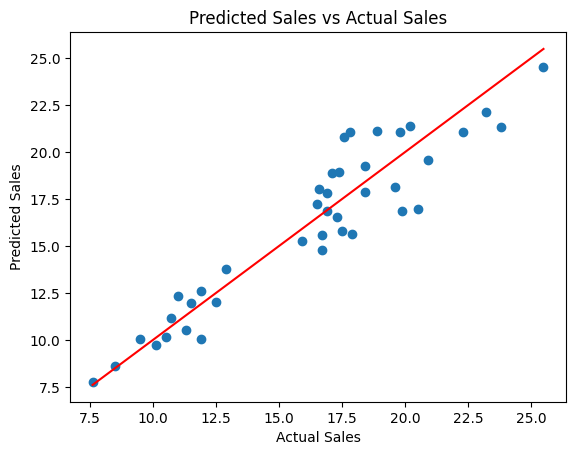

In [242]:
# Visualization of our predictions:
plt.scatter(sales_test, sales_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted Sales vs Actual Sales")
plt.plot([min(sales_test), max(sales_test)], [min(sales_test), max(sales_test)], color="red")  # Ideal 45-degree line
plt.show()



---



5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [243]:
new_data = [[200, 40, 50]]

In [244]:
sales_prediction = model.predict(new_data)
print('The predicted value of sales by our Linear Regression model on the given data is', sales_prediction[0][0])

The predicted value of sales by our Linear Regression model on the given data is 19.732193695644185




---



7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [245]:
new_features_test = features_test[:,:-1]
new_features_test = np.hstack((new_features_test, np.zeros((new_features_test.shape[0],1))))

In [246]:
print(new_features_test)

[[210.8  49.6   0. ]
 [202.5  22.3   0. ]
 [ 95.7   1.4   0. ]
 [280.2  10.1   0. ]
 [253.8  21.3   0. ]
 [283.6  42.    0. ]
 [163.3  31.6   0. ]
 [180.8  10.8   0. ]
 [ 70.6  16.    0. ]
 [215.4  23.6   0. ]
 [164.5  20.9   0. ]
 [ 69.2  20.5   0. ]
 [214.7  24.    0. ]
 [109.8  47.8   0. ]
 [225.8   8.2   0. ]
 [125.7  36.9   0. ]
 [131.7  18.4   0. ]
 [290.7   4.1   0. ]
 [ 25.6  39.    0. ]
 [210.7  29.5   0. ]
 [100.4   9.6   0. ]
 [ 67.8  36.6   0. ]
 [ 25.1  25.7   0. ]
 [107.4  14.    0. ]
 [112.9  17.4   0. ]
 [188.4  18.1   0. ]
 [ 43.1  26.7   0. ]
 [248.8  27.1   0. ]
 [166.8  42.    0. ]
 [240.1  16.7   0. ]
 [239.9  41.5   0. ]
 [234.5   3.4   0. ]
 [149.7  35.6   0. ]
 [170.2   7.8   0. ]
 [248.4  30.2   0. ]
 [184.9  21.    0. ]
 [222.4   3.4   0. ]
 [129.4   5.7   0. ]
 [216.8  43.9   0. ]
 [ 19.6  20.1   0. ]]


In [247]:
new_sales_pred = model.predict(new_features_test)

In [248]:
print(new_sales_pred)

[[21.36281265]
 [18.09083182]
 [10.05344203]
 [21.11257363]
 [20.81328416]
 [24.58895941]
 [16.89062597]
 [15.70988293]
 [10.1763196 ]
 [18.93539186]
 [15.85347487]
 [10.5631908 ]
 [18.93807931]
 [15.61422758]
 [17.92036537]
 [15.36611829]
 [13.78911159]
 [21.07226186]
 [10.06922216]
 [19.28485187]
 [11.15779223]
 [12.14610445]
 [ 8.67035806]
 [11.99701742]
 [12.65051681]
 [16.88116622]
 [ 9.76488954]
 [21.13590973]
 [18.15571685]
 [19.58440736]
 [22.13044781]
 [17.9046397 ]
 [16.55397821]
 [14.81672281]
 [21.43351011]
 [16.98739987]
 [17.2381822 ]
 [12.35296932]
 [21.10557693]
 [ 7.79002304]]


You can compare the sales_pred (printed in question 4), and the above printed new_sales_pred. There is very slightly difference present, but it is present which tells us that TV advertisement gives very less impact on sales.

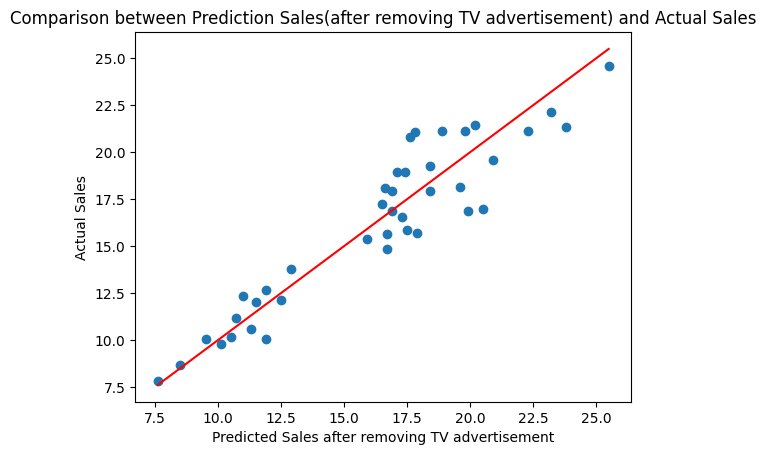

In [249]:
# Visualization of comparison:
plt.scatter(sales_test, new_sales_pred)
plt.plot([min(sales_test), max(sales_test)], [min(sales_test), max(sales_test)], color="red")  # Ideal 45-degree line
plt.title("Comparison between Prediction Sales(after removing TV advertisement) and Actual Sales")
plt.xlabel("Predicted Sales after removing TV advertisement")
plt.ylabel("Actual Sales")
plt.show()



---



6.	How does the performance of the linear regression model change when the dataset is normalized?

In [250]:
features_n = sales_dataset.iloc[:,1:4].values
sales_n = sales_dataset.iloc[:,[4]]

In [251]:
# Handling Missing datas:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(features_n)
features_n = imputer.transform(features_n)

In [252]:
sales_list = sales_n['Sales'].tolist()
print(sales_list)

[22.1, 10.4, 12.0, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 13.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 17.5, 5.6, 20.5, 9.7, 17.0, 15.0, 20.9, 18.9, 10.5, 21.4, 11.9, 13.2, 17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9, 8.5, 16.1, 10.6, 23.2, 19.8, 9.7, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7, 5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 20.7, 14.0, 16.0, 11.3, 11.0, 13.4, 18.9, 22.3, 18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12.0, 16.0, 12.9, 16.7, 14.0, 7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4, 17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15.0, 7.2, 12.0, 5.3, 19.8, 18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 16.6, 15.2, 19.7, 10.6, 6.6, 11.9, 24.7, 9.7, 1.6, 17.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9, 19.2, 20.1, 10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 16.0, 20.6, 3.2, 15.3, 10.1, 7.3, 12.9, 16.4, 13.3, 19.9, 18.0, 11.9, 16.9, 8.0, 17.2, 17.1, 20.0, 8.4, 17

In [253]:
# Normalization of dataset:
from sklearn import preprocessing
normalized_features = preprocessing.normalize(features_n)

In [254]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

normalized_sales = normalize(sales_list, 0, 1)
print(normalized_sales)

[0.8070866141732284, 0.3464566929133859, 0.40944881889763785, 0.5866141732283465, 0.6417322834645669, 0.2204724409448819, 0.40157480314960636, 0.4566929133858268, 0.12598425196850394, 0.5511811023622047, 0.4330708661417323, 0.6220472440944882, 0.2992125984251969, 0.4763779527559055, 0.6850393700787402, 0.8188976377952756, 0.42913385826771655, 0.8976377952755905, 0.3818897637795276, 0.5118110236220472, 0.6456692913385826, 0.6259842519685039, 0.15748031496062992, 0.7440944881889764, 0.3188976377952756, 0.6062992125984252, 0.5275590551181103, 0.7598425196850394, 0.6811023622047243, 0.3503937007874016, 0.7795275590551181, 0.4055118110236221, 0.4566929133858268, 0.6220472440944882, 0.4055118110236221, 0.6377952755905512, 0.9370078740157479, 0.515748031496063, 0.3346456692913386, 0.7834645669291338, 0.5905511811023623, 0.6102362204724411, 0.7519685039370079, 0.6417322834645669, 0.27165354330708663, 0.5708661417322836, 0.35433070866141736, 0.8503937007874015, 0.7165354330708662, 0.31889763779

In [255]:
# Splitting data into training and testing sets:
from sklearn.model_selection import train_test_split
n_features_train, n_features_test, n_sales_train, n_sales_test = train_test_split(normalized_features, normalized_sales, test_size = 0.2, random_state = 1)

In [256]:
#Linear Regression:
n_model = LinearRegression()
n_model.fit(n_features_train, n_sales_train)

LinearRegression()

In [257]:
n_sales_pred = n_model.predict(n_features_test)

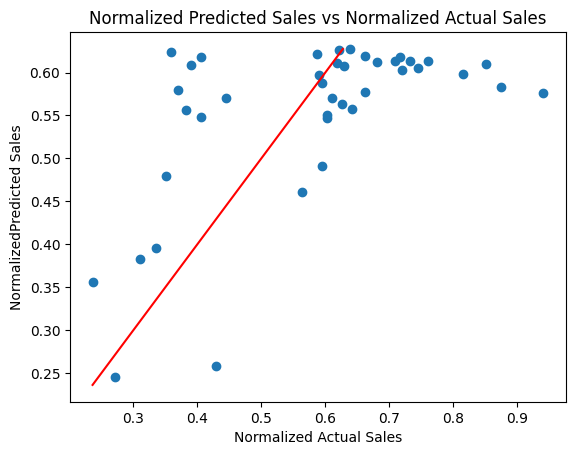

In [258]:
# Visualization of our predictions:
plt.scatter(n_sales_test, n_sales_pred)
plt.plot([min(n_sales_test), max(n_sales_pred)], [min(n_sales_test), max(n_sales_pred)], color = 'red')
plt.title("Normalized Predicted Sales vs Normalized Actual Sales")
plt.xlabel("Normalized Actual Sales")
plt.ylabel("NormalizedPredicted Sales")
plt.show()



---



---



Project contributor

-- Name: Amit Pareek

-- email id: pareekamit043@gmail.com

-- In Finlatics, under guidance of Saniya Bahugana